In [ ]:

!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/Covid-19-master/Classifying_Covid_19/training_dataset",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')



classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 50 images belonging to 2 classes.
Epoch 1/3
200/200 [==============================] - 132s 659ms/step - loss: 0.2020 - acc: 0.9052
Epoch 2/3
200/200 [==============================] - 118s 588ms/step - loss: 0.0133 - acc: 0.9964
Epoch 3/3
200/200 [==============================] - 117s 587ms/step - loss: 0.0125 - acc: 0.9966


Predection -  COVID


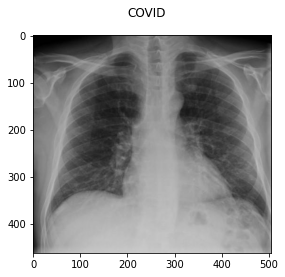

In [ ]:
img_src = "/content/drive/MyDrive/Train/COVID/000001.jpg"
img = cv2.imread(img_src)

img_pred = image.load_img("/content/drive/MyDrive/Train/COVID/000001.jpg", target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)
print ("Predection - ",prediction)



Predection -  Normal


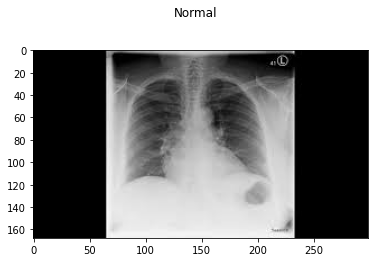

In [ ]:
img_src = "/content/drive/MyDrive/Train/NON COVID/images.jpg"
img = cv2.imread(img_src)

img_pred = image.load_img("/content/drive/MyDrive/Train/NON COVID/images.jpg", target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = classifier.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)
print ("Predection - ",prediction)